In [1]:
#Importing file and packages

import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df2016 = pd.read_csv('results_pct_2016.11.08.txt', header=None, sep='\n')
df2016 = df2016[0].str.split('\t', expand=True)


df2016.columns = df2016.iloc[0]
df2016 = df2016.replace(r'^\s*$', np.nan, regex=True)
df2016j = df2016.replace('JIll Stein (Write-In)', 'Jill Stein (Write-In)')
df_2016 = df2016j.drop([0])


df_2016["Total Votes"] = pd.to_numeric(df_2016["Total Votes"])

df_2016.head()

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,
1,ALAMANCE,11/08/2016,05,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,705,685,65,9,1464,NaN
2,ALAMANCE,11/08/2016,02,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,954,1004,63,5,2026,NaN
3,ALAMANCE,11/08/2016,09N,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,468,374,26,5,873,NaN
4,ALAMANCE,11/08/2016,03C,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,438,637,82,4,1161,NaN
5,ALAMANCE,11/08/2016,1210,1385,S,US HOUSE OF REPRESENTATIVES DISTRICT 6,B. Mark Walker,REP,1,260,300,32,2,594,NaN


In [2]:
#Only Presidential Votes

pres_mask = (df_2016['Contest Name']=='US PRESIDENT')
df_pres2016 = df_2016[pres_mask]

In [3]:
#Only Gubernatorial Votes

gub_mask = (df_2016['Contest Name']=='NC GOVERNOR')
df_gub2016 = df_2016[gub_mask]

In [4]:
#Only Presidential and Gubernatorial Votes

pg_mask = (df_2016['Contest Name']=='US PRESIDENT')|(df_2016['Contest Name']=='NC GOVERNOR')
df_pg2016 = df_2016[pg_mask]

In [5]:
#Pivot Table of Presidential Votes Total by County

pres_by_county = df_pres2016.pivot_table('Total Votes', index='County', columns = 'Choice', aggfunc='sum')
pres_by_county.head()

Choice,Donald J. Trump,Gary Johnson,Hillary Clinton,Jill Stein (Write-In),Write-In (Miscellaneous)
County,,,,,
ALAMANCE,38815,1795,29833,216,498
ALEXANDER,13893,437,3767,23,151
ALLEGHANY,3814,129,1306,0,66
ANSON,4506,129,5859,3,48
ASHE,9412,332,3500,0,180


In [6]:
#Pivot Table of Gubernatorial Votes Total by County

gub_by_county = df_gub2016.pivot_table('Total Votes', index='County', columns = 'Choice', aggfunc='sum')
gub_by_county.head()

Choice,Lon Cecil,Pat McCrory,Roy Cooper
County,,,
ALAMANCE,1283,37501,32032
ALEXANDER,387,13248,4648
ALLEGHANY,97,3583,1643
ANSON,112,4511,5851
ASHE,288,8834,4304


In [7]:
#Pivot Table of Presidential and Gubernatorial Votes Total by Party

sum_pg_by_party = df_pg2016.pivot_table('Total Votes', index='Contest Name', columns = 'Choice Party', aggfunc='sum')
sum_pg_by_party

Choice Party,DEM,LIB,REP
Contest Name,,,
NC GOVERNOR,2309157,102977,2298880
US PRESIDENT,2189316,130126,2362631


<AxesSubplot:ylabel='Contest Name'>

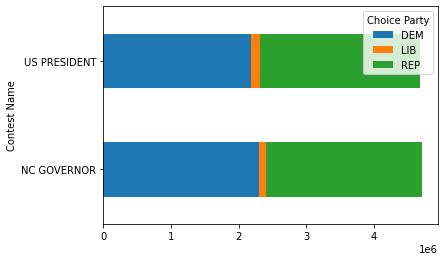

In [8]:
#Stacked bar graph of total votes in Presdiental and Governor election by Choice Party

sum_pg_by_party.plot.barh(stacked=True)

This categorical bar graph illustrates the total votes for the 2016 Presidential and Gubernatorial elections by party. Although this graph is interesting and may provide some insight down the road, it is still difficult to understand trends between the two 2016 elections. An area of improvement would be to look at the proportion of each choice party for each contest type and see how that differs.